# DSC540: Data Preparation

## Week 3&4 Exercises

### Activity 5: Boston Housing Dataset 

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Read Boston housing dataset from local directory
Bhd = pd.read_csv('Boston_Housing.csv')

In [3]:
# Check the first 10 records.
Bhd.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
# Find Total number of records
print(' Total number of records in the Boston Housing dataframe is : ', len(Bhd.index))

 Total number of records in the Boston Housing dataframe is :  506


In [5]:
# Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT
Bhd_sml = Bhd.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis=1)
Bhd_sml.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2


In [6]:
# Check the last 7 records of the new dataframe.
Bhd_sml.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


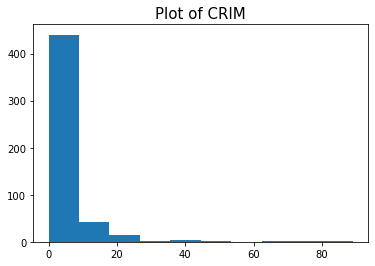

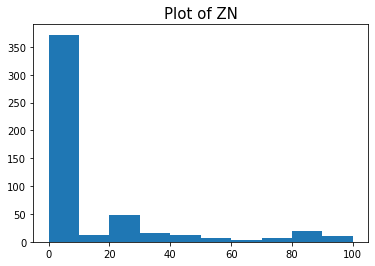

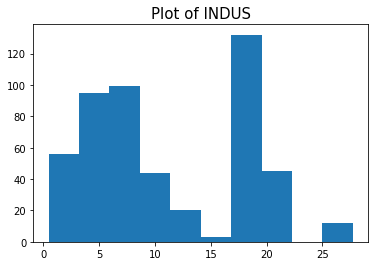

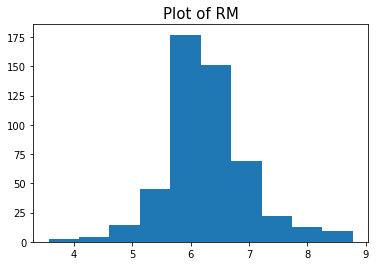

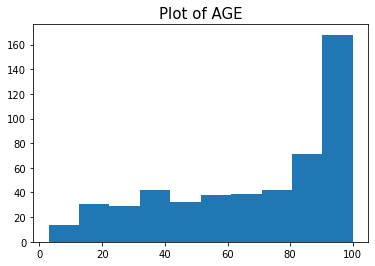

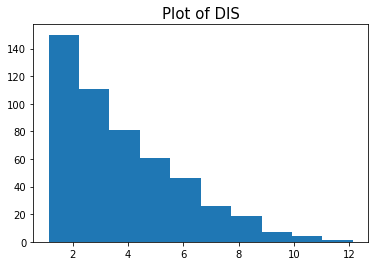

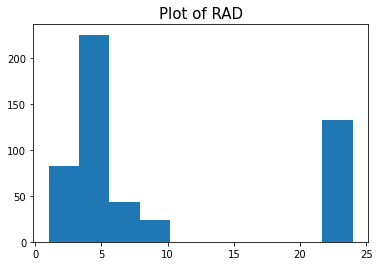

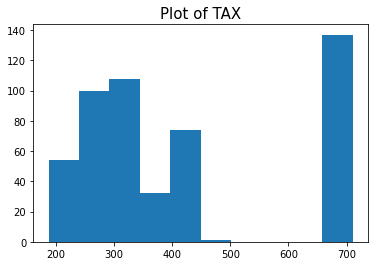

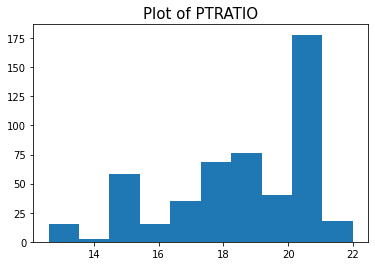

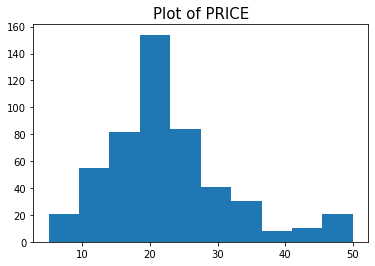

In [7]:
# Plot the histograms of all the variables in the new dataframe. Plot them all using for loop.
for x in Bhd_sml.columns:
    plt.title("Plot of "+x,fontsize=15)   # Name the title of the plot
    plt.hist(Bhd_sml[x])                   # Build hostogram of column
    plt.show() 

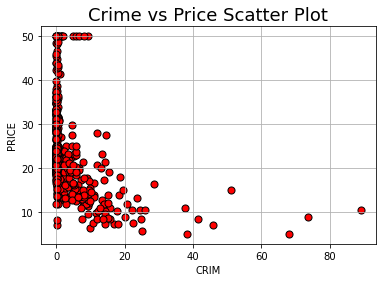

In [8]:
# Create scatter plot of crime versus price.
Bhd_sml.plot.scatter('CRIM', 'PRICE', s=50, c='red', edgecolor='k')
plt.grid(True)
plt.title('Crime vs Price Scatter Plot', fontsize=18)
plt.show()

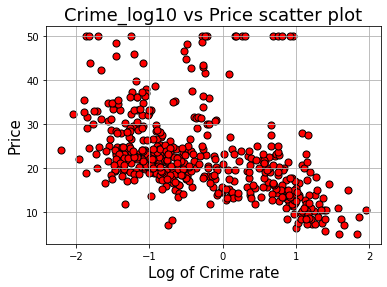

In [12]:
# Plot using log10(crime) vs price.

CRIM_lg = np.log10(Bhd_sml['CRIM'])
plt.scatter(CRIM_lg, Bhd_sml['PRICE'], s=50, c='red', edgecolor='k')
plt.grid(True)
plt.title('Crime_log10 vs Price scatter plot', fontsize=18)
plt.xlabel("Log of Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

In [10]:
# Calculate some useful statistics.

In [11]:
# Mean of room per dwelling : 
print('Mean of room per dwelling is : ', Bhd_sml['RM'].mean())

Mean of room per dwelling is :  6.284634387351787


In [13]:
# Median of age :
print('Median of age is : ', Bhd_sml['AGE'].median())

Median of age is :  77.5


In [14]:
# Mean of distance to five Boston employment centers :
print('Mean of distance to five Boston employment centers is : ', Bhd_sml['DIS'].mean())

Mean of distance to five Boston employment centers is :  3.795042687747034


In [15]:
# Percentage of houses with low price(<20,000)
#find all houses count, count of houses with prce less than 20. 
#calculate percentage

Count_low = Bhd_sml[Bhd_sml['PRICE'] < 20].count()['PRICE']    # count of low price houses
Count_all = Bhd_sml['PRICE'].count()                           # count of all rows

print('Percentage of houses with low price (<20,000) is : ', Count_low*100/Count_all)

Percentage of houses with low price (<20,000) is :  41.50197628458498


### Activity 6: Working with Adult Income Dataset

In [16]:
# Read Adult Income Dataset from URL/CSV file

Ad_inc = pd.read_csv('adult_income_data.csv') 
Ad_inc.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [17]:
# Read txt file line by line and create list of coulumn names

names = []
with open('adult_income_names.txt', 'r') as t:       # Open txt file for read
    for line in t:                                  
        t.readline()                                 # read line by line
        var=line.split(":")[0]                       # end reading when encountering ':'
        names.append(var)                            # add column name into name list

names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [18]:
# Add a name of Income into list of column names into the dataset. 

names.append('Income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [19]:
# read the csv file again, with column with list of names as column

Ad_inc1 = pd.read_csv('adult_income_data.csv', names=names)
Ad_inc1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [20]:
# Find the missing value

Ad_inc1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [21]:
# Create dataframe with only age, education, and occupation by using subsetting

Ad_inc2 = Ad_inc1[['age', 'education', 'occupation']]
Ad_inc2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


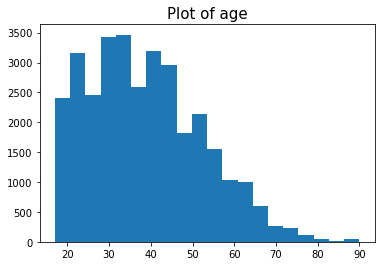

In [22]:
# Plot histogram of age wih a bin size of 20.

plt.title("Plot of age",fontsize=15)   # Name the title of the plot
plt.hist(Ad_inc2['age'], bins=20)       # Build hostogram of column
plt.show()

<AxesSubplot:>

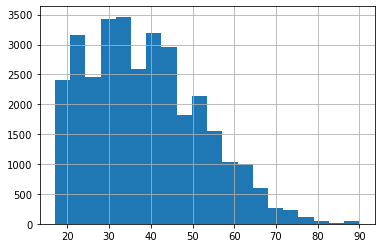

In [23]:
# Plot histogram of age wih a bin size of 20.
Ad_inc2['age'].hist(bins=20)

In [24]:
#  Create a function to strip whitespace characters.

def strip_wt(var):
    return var.strip()                       # use strip function to remove whitespace
    

In [30]:
# Apply above function to all columns with string values.

def strip_col(var):                         # Function to create new col and strip whitespace 
    Ad_inc2['newcol'] = var.apply(strip_wt)
    Ad_inc2.var = Ad_inc2['newcol']           # Replace old col with new col
    
    return

# Strip whitespace from 'education' column
strip_col(Ad_inc2['education'])

# Strip whitespace from 'occupation' column
strip_col(Ad_inc2['occupation'])

Ad_inc2 = Ad_inc2.drop(['newcol'], axis=1)

Ad_inc2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [32]:
# Find number of people who are aged between 30 and 50

Count = Ad_inc2[(30 < Ad_inc2['age']) & (Ad_inc2['age'] < 50)].count()['age']

print('There are ', Count, ' people aged between 30 and 50.')

There are  14927  people aged between 30 and 50.


In [33]:
# Group the records based on age and education to find how the mean age is distributed. 

Ad_inc3 = Ad_inc2.groupby(['education'])['age'].mean()

# Display mean of age by education
Ad_inc3

education
 10th            37.429796
 11th            32.355745
 12th            32.000000
 1st-4th         46.142857
 5th-6th         42.885886
 7th-8th         48.445820
 9th             41.060311
 Assoc-acdm      37.381443
 Assoc-voc       38.553546
 Bachelors       38.904949
 Doctorate       47.702179
 HS-grad         38.974479
 Masters         44.049913
 Preschool       42.764706
 Prof-school     44.746528
 Some-college    35.756275
Name: age, dtype: float64

<AxesSubplot:xlabel='education'>

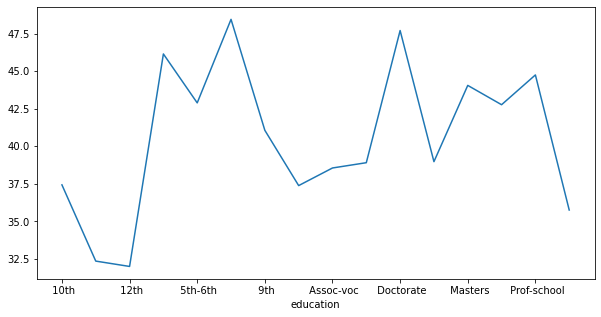

In [34]:
# Plot series of mean

Ad_inc3.plot(kind='line', figsize=(10,5))

In [35]:
# Group by occupation and show the summary statistics of age.
Ad_inc2.groupby(['occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


1 Exec-managerial occupation has oldest workers with average of 42 years. 
2 Occupation "?" has largest share of the workforce above 75th percentile.(61.0)
3 Armed-Forces occupation has least count of '9' and its very low as compared to other occupations. 
Hence, this group can be considered to have outliers

<BarContainer object of 15 artists>

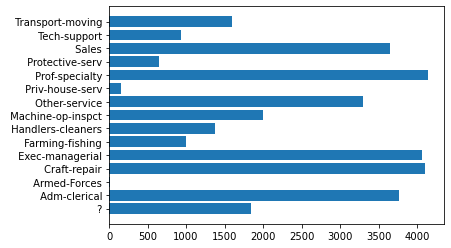

In [36]:
# Plot values on bar chart

summary = Ad_inc2.groupby(['occupation'])['age'].describe()  # Write summary into dataframe

plt.barh(summary.index, summary['count'])                   # PLot horizontal bar chart.

In [37]:
# Merge the data using common key

# Create 2 test datasets with one common variable.

Ad_inc4 = Ad_inc1[['age', 'education', 'occupation']].sample(5, random_state=101) #create DF with 5 sample records.
Ad_inc4.head()

,age,education,occupation
22357,51,HS-grad,Machine-op-inspct
26009,19,11th,Sales
20734,40,HS-grad,Exec-managerial
17695,17,10th,Handlers-cleaners
27908,61,7th-8th,Craft-repair


In [39]:
Ad_inc5 = Ad_inc1[['age', 'marital-status', 'native-country']].sample(5, random_state=101) #create DF with 5 sample records.
Ad_inc5.head()

,age,marital-status,native-country
22357,51,Married-civ-spouse,United-States
26009,19,Never-married,United-States
20734,40,Married-civ-spouse,United-States
17695,17,Never-married,United-States
27908,61,Married-civ-spouse,Poland


In [40]:
# Merge above 2 dataframes using age column

Ad_mrg = pd.merge(Ad_inc4, Ad_inc5, on='age', how='inner') 
Ad_mrg

,age,education,occupation,marital-status,native-country
0,51,HS-grad,Machine-op-inspct,Married-civ-spouse,United-States
1,19,11th,Sales,Never-married,United-States
2,40,HS-grad,Exec-managerial,Married-civ-spouse,United-States
3,17,10th,Handlers-cleaners,Never-married,United-States
4,61,7th-8th,Craft-repair,Married-civ-spouse,Poland


### 3. Create a series and practice basic arithmetic steps

In [41]:
# A. series 1

dt1 = [7.3, -2.5, 3.4, 1.5]
label1 = ['a', 'c', 'd', 'e']

series1 = pd.Series(data=dt1, index=label1)      # Create series
print(series1)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64


In [42]:
# B. Series 2

dt2 = [-2.1, 3.6, -1.5, 4, 3.1]
label2 = ['a', 'c', 'e', 'f', 'g']

series2 = pd.Series(data=dt2, index=label2)      # Create series
print(series2)

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [43]:
# C. Add both series

series_sum = series1 + series2
print(series_sum)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [44]:
# D. Substract series1 from series2

series_sub = series2 - series1
print(series_sub)

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64


# Activity 7: READING TABULAR DATA FROM A WEB PAGE AND CREATING DATAFRAMES

In [64]:
## import the packages / libraries
## BeautifulSoup library for reading html web pages
## pandas library for creating dataframe
## codecs library for reading the html file - data source with utf-8 format.

from bs4 import BeautifulSoup
import pandas as pd
import codecs

In [65]:
## using codecs.open() method from codecs library  to read the html file source
## BeautifulSoup library helps to read and provide the html formatted data into a soup variable
## Downloaded the HTML source as file from the wikipedia web page and stored locally for the program

fd = codecs.open('List of countries by GDP (nominal) - Wikipedia.html', 'r', 'utf-8')
soup = BeautifulSoup(fd)    ## BeautifulSoup library helps read the html file
fd.close()                  ## close the file

In [66]:
## find total number of 'table' elements present within the web page source. 
## this will be the first step towards locating the GDP data tables.

all_tables = soup.find_all('table')
print(f'Total number of tables is: {len(all_tables)}')

Total number of tables is: 10


In [67]:
## 'wikitable' is the class of the tables consisting of required GDP data. We are looking for these specific tables.
## Therefore, class attribute named wikitable is something we are intersted in.
## data_table will be holding the data and headers related to all wikitables are read.
## we will be storing this information from all wikitables first and then
## printing and checking how many such wikitables are present as well as the kind of information stored.

data_table = soup.find_all('table', attrs={"class": 'wikitable'})
print(f'Length of data_table is: {len(data_table)}')
print(f'Type of data_table is: {type(data_table)}')

Length of data_table is: 4
Type of data_table is: <class 'bs4.element.ResultSet'>


In [68]:
## print out the data_table to see the format and see how to navigate through the data

print(data_table)

[<table class="wikitable" style="margin:auto; width:100%;">
<tbody><tr>
<td style="width:33%; text-align:center"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2020 estimates)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2019)</b><sup class="reference" id="cite_ref-worldbank_21-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-21">[20]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2019)</b><sup class="reference" id="cite_ref-22"><a href="https://en.wikipedia.org/wik

In [69]:
## Looking at above data_table, it is ResultSet and appears like a list. [0] occurrence in data_table holds entire info.
## we need to segregate the data and table names using below steps.
## tbody element within the first wikitable - consists of sub element 'tr'. [0] occurrence of such data is explored further.
## The 'tr' element consists of 'td' elements further within, each of which consists of the table names. 
## we will be looking for the first 'tr' element i.e. recursive=False option.
## so, we will be retrieving those table names in this manner

#### at high level, describing the elements and some of the structures within them, for further understanding.
#### this will help in further processing and data, tables, headers and columns segregation
## <tbody>
##    <tr>
##      <td>  </td>
##      <td>  </td>
##    </tr>
##    <thead>
##       <tr>
##         <th>    </th>
##         <th>    </th>
##       </tr>
##    </thead>
## </tbody>

tables = data_table[0].tbody.find_all('tr', recursive=False)[0]

tables_list = [td for td in tables.find_all('td')]        ## generator expression to extract table list from 'td' elements

print(f'Total number of table names present within first wiki table is: {len(tables_list)}')
print(f'====================================================================')

Total number of table names present within first wiki table is: 3


In [70]:
## as described earlier, data_table consists of the headers and data information related to all wikitables.
## we will be reading through this data_table. will be using find_all() method to search through the data.
## first occurence of 'tr' element within 'tbody' has the data from the first table.
## Further to this, the bunch of 'td' elements within the 'tr' elements can help us with segregating GDP wikitable data next

data = data_table[0].tbody.find_all('tr', recursive=False)[1].find_all('td', recursive=False)

In [71]:
## define an empty list to store the data from three of the wikitables.
## then segregate all the 'wikitable' tables data into list of wikitables i.e. into data_table_list
## we perform this by reading through the 'data' source created previously, consisting of all 'td' elements

data_table_list = []

for td in data:
    data_table_list.append(td.find_all('table'))

print(f'number of data tables: {len(data_table_list)}')
print('===============================')
print(data_table_list)

number of data tables: 3
[[<table class="wikitable sortable jquery-tablesorter" style="margin-left:auto; margin-right:auto; margin-top:0;">
<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country/Territory</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$million)
</th></tr></thead><tbody>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_20-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-20">[19]</a></sup></td>
<td align="right">83,844,988


In [72]:
## as we notice element type 'a' consists of the table names i.e. source names. [0] occurence of element 'a' has table names
## to find out the source names, we will use getText() method
## getText() method extracts the text from title field element

table_names = [table.findAll('a')[0].getText() for table in tables_list]

print(f'Names of the GDP wikitables are : {table_names}')

Names of the GDP wikitables are : ['International Monetary Fund', 'World Bank', 'United Nations']


Processing for extracting data and columns from First Wikitable - "International Monetory Fund"

In [73]:
## create an empty list to store the data within the 'thead' element. this data is in the form of multiple 'th' elements.
## this extract will be used further to derive the column names
## For extracting the Column names within each of the GDP tables, we will be performing the steps - in two parts
## Below is the first part, where we look through the [0] occurence of data_table_list prepared earlier.

thead_list1 = []

for thead in data_table_list[0]:
    thead_list1.append(thead.find('thead'))

print(thead_list1)

[<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country/Territory</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$million)
</th></tr></thead>]


In [74]:
## Below is the second part of this process, where we extract the actual Column names

## extracting the actual header names from the 'thead' data extracted in above step.
## the 'th' elements within are being used to extract the header names of the first wikitable consisting of GDP data
## getText() method extracts the text from title field element

head1 = [head.getText().strip() for head in thead_list1[0].find_all('th')]

print(f'Column Names within First GDP tables are : {head1}')

Column Names within First GDP tables are : ['Rank', 'Country/Territory', 'GDP(US$million)']


In [75]:
### now need to extract the actual data
## create an empty list to store the data within the 'tbody' element. this data is in the form of multiple 'tr' elements.
## this extract will be used further to derive the data rows
## For extracting the data rows within each of the GDP tables, we will be performing the steps - in two parts
## Below is the first part, where we look through the [0] occurence of data_table_list prepared earlier.

tbody_list1 = []

for tbody in data_table_list[0]:
    tbody_list1.append(tbody.find('tbody'))

print(tbody_list1)

[<tbody>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_20-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-20">[19]</a></sup></td>
<td align="right">83,844,988
</td></tr>
<tr>
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x"

In [76]:
## Below is the second part of this process, where we extract the actual Column names

## extracting the actual data from the 'tbody' data extracted in above step.
## the 'tr' elements within are being used to extract the data rows part of the first wikitable consisting of GDP data
## [0] occurrence of 'tr' elements list consists of table title 'Gross world product', which needs to be ommitted - not data
## Hence starting to read from [1:] occurrence onwards, until the end

data1 = [dat for dat in tbody_list1[0].find_all('tr')[1:]]

print(f'Data part within First GDP tables are : {data1}')

Data part within First GDP tables are : [<tr>
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
<td align="right">20,807,269
</td></tr>, <tr>
<td align="right">2</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_People's_Republic_of_China.svg.png" srcset="/

In [77]:
## now extracting the actual data rows from the data part segregated above.
## 'td' elements are present within the each of the 'tr' elements. each such 'td' elements holds the data points within.
## So, we may need to write generator expression within another generator expression to be able to extract each data points.
## getText() method extracts the text from title field element

data1_rows = [[td.getText().strip() for td in tr.find_all('td')] for tr in data1]

In [78]:
## format the data rows and columns extracted from first wikitable - "International Monetory Fund", into a DataFrame
## Then we will print initial few rows with head() method

df_wiki1 = pd.DataFrame(data1_rows, columns=head1)
df_wiki1.head()

,Rank,Country/Territory,GDP(US$million)
0,1,United States,"20,807,269"
1,2,China[n 2][n 3],"14,860,775"
2,3,Japan,"4,910,580"
3,4,Germany,"3,780,553"
4,5,United Kingdom,"2,638,296"


## Processing for extracting data and columns from Second Wikitable - "World Bank"

In [79]:
## similar to the column name extract steps for first GDP wikitable, the next occurrences viz. [1] and [2] also hold same
## column names. we are just ensuring they are extracted as expected.

thead_list2 = []

for thead in data_table_list[1]:
    thead_list2.append(thead.find('thead'))

print(thead_list2)

[<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country/Territory</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$million)
</th></tr></thead>]


In [80]:
## Below is the second part of this process, where we extract the actual Column names

## extracting the actual header names from the 'thead' data extracted in above step.
## the 'th' elements within are being used to extract the header names of the first wikitable consisting of GDP data
## getText() method extracts the text from title field element

head2 = [head.getText().strip() for head in thead_list2[0].find_all('th')]

print(f'Column Names within Second GDP tables are : {head2}')

Column Names within Second GDP tables are : ['Rank', 'Country/Territory', 'GDP(US$million)']


In [81]:
### now need to extract the actul data

## create an empty list to store the data within the 'tbody' element. this data is in the form of multiple 'tr' elements.
## this extract will be used further to derive the data rows
## For extracting the data rows within each of the GDP tables, we will be performing the steps - in two parts
## Below is the first part, where we look through the [1] occurence of data_table_list prepared earlier.

tbody_list2 = []

for tbody in data_table_list[1]:
    tbody_list2.append(tbody.find('tbody'))

print(tbody_list2)

[<tbody>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i></td>
<td align="right"><span data-sort-value="7007877515410000000♠">87,751,541</span>
</td></tr>
<tr>
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a>

In [82]:
## Below is the second part of this process, where we extract the actual Column names

## extracting the actual data from the 'tbody' data extracted in above step.
## the 'tr' elements within are being used to extract the data rows part of the first wikitable consisting of GDP data
## [0] occurrence of 'tr' elements list consists of table title 'Gross world product', which needs to be ommitted - not data
## Hence starting to read from [1:] occurrence onwards, until the end

data2 = [dat for dat in tbody_list2[0].find_all('tr')[1:]]

print(f'Data part within Second GDP tables are : {data2}')

Data part within Second GDP tables are : [<tr>
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
<td align="right"><span data-sort-value="7007214277000000000♠">21,427,700</span>
</td></tr>, <tr>
<td align="right">2</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag

In [83]:
## now extracting the actual data rows from the data part segregated above.
## 'td' elements are present within the each of the 'tr' elements. each such 'td' elements holds the data points within.
## So, we may need to write generator expression within another generator expression to be able to extract each data points.
## getText() method extracts the text from title field element

data2_rows = [[td.getText().strip() for td in tr.find_all('td')] for tr in data2]

In [84]:
## format the data rows and columns extracted from first wikitable - "International Monetory Fund", into a DataFrame
## Then we will print initial few rows with head() method

df_wiki2 = pd.DataFrame(data2_rows, columns=head2)
df_wiki2.head()

,Rank,Country/Territory,GDP(US$million)
0,1,United States,"21,427,700"
1,2,China[n 9],"14,342,903"
2,3,Japan,"5,081,770"
3,4,Germany,"3,845,630"
4,5,India,"2,875,142"


## Processing for extracting data and columns from Third Wikitable - "United Nations"

In [85]:
## similar to the column name extract steps for first GDP wikitable, the next occurrences viz. [1] and [2] also hold same
## column names. we are just ensuring they are extracted as expected.
## So, we won't be performing the duplicate step to extract the column names from the 'th' elements within

thead_list3 = []

for thead in data_table_list[2]:
    thead_list3.append(thead.find('thead'))

print(thead_list3)

[<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country/Territory</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$million)
</th></tr></thead>]


In [86]:
## Below is the second part of this process, where we extract the actual Column names

## extracting the actual header names from the 'thead' data extracted in above step.
## the 'th' elements within are being used to extract the header names of the first wikitable consisting of GDP data
## getText() method extracts the text from title field element

head3 = [head.getText().strip() for head in thead_list3[0].find_all('th')]

print(f'Column Names within Third GDP tables are : {head3}')

Column Names within Third GDP tables are : ['Rank', 'Country/Territory', 'GDP(US$million)']


In [87]:
### now need to extract the actul data

## create an empty list to store the data within the 'tbody' element. this data is in the form of multiple 'tr' elements.
## this extract will be used further to derive the data rows
## For extracting the data rows within each of the GDP tables, we will be performing the steps - in two parts
## Below is the first part, where we look through the [2] occurence of data_table_list prepared earlier.

tbody_list3 = []

for tbody in data_table_list[2]:
    tbody_list3.append(tbody.find('tbody'))

print(tbody_list3)

[<tbody>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-UN_36-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-UN-36">[22]</a></sup></td>
<td align="right"><span data-sort-value="7007874452600000000♠">87,445,260</span>
</td></tr>
<tr style="">
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.s

In [88]:
## Below is the second part of this process, where we extract the actual Column names

## extracting the actual data from the 'tbody' data extracted in above step.
## the 'tr' elements within are being used to extract the data rows part of the first wikitable consisting of GDP data
## [0] occurrence of 'tr' elements list consists of table title 'Gross world product', which needs to be ommitted - not data
## Hence starting to read from [1:] occurrence onwards, until the end

data3 = [dat for dat in tbody_list3[0].find_all('tr')[1:]]

print(f'Data part within Third GDP tables are : {data3}')

Data part within Third GDP tables are : [<tr style="">
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
<td align="right"><span data-sort-value="7007214332260000000♠">21,433,226</span>
</td></tr>, <tr>
<td align="right">2</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/2

In [89]:
## now extracting the actual data rows from the data part segregated above.
## 'td' elements are present within the each of the 'tr' elements. each such 'td' elements holds the data points within.
## So, we may need to write generator expression within another generator expression to be able to extract each data points.
## getText() method extracts the text from title field element

data3_rows = [[td.getText().strip() for td in tr.find_all('td')] for tr in data3]

In [90]:
## format the data rows and columns extracted from first wikitable - "International Monetory Fund", into a DataFrame
## Then we will print initial few rows with head() method

df_wiki3 = pd.DataFrame(data3_rows, columns=head3)
df_wiki3.head()

,Rank,Country/Territory,GDP(US$million)
0,1,United States,"21,433,226"
1,2,China[n 9],"14,342,933"
2,3,Japan,"5,082,465"
3,4,Germany,"3,861,123"
4,5,India,"2,891,582"


# Activity 8: Handling Outliers and Missing Data

In [48]:
#import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
# Read the visit_data.csv file.
vd = pd.read_csv("visit_data.csv")

In [50]:
vd.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [51]:
# checking the size of the data : rows X columns information

vd.shape

(1000, 7)

In [52]:
# Check for duplicates.
## Try to find duplicates in the columns first_name, last_name, email and ip_address
## source : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html. 
## duplicated() method identifies which data elements hold duplicate values. 
## value_counts() provides the counts of duplicate values in a given column.
## using the filter to check the True values (indicated with 1) returned from duplicated() function, to identify counts.
print(f'Number of duplicates in the First Name: {vd.first_name.duplicated()[vd.first_name.duplicated() == 1].value_counts()}')
print(f'Number of duplicates in the Last Name: {vd.last_name.duplicated()[vd.last_name.duplicated() == 1].value_counts()}')

print(f'Number of duplicates in the email: {vd.email.duplicated().value_counts()}')
print(f'Number of duplicates in the IP Address: {vd.ip_address.duplicated().value_counts()}')

Number of duplicates in the First Name: True    320
Name: first_name, dtype: int64
Number of duplicates in the Last Name: True    299
Name: last_name, dtype: int64
Number of duplicates in the email: False    1000
Name: email, dtype: int64
Number of duplicates in the IP Address: False    1000
Name: ip_address, dtype: int64


1. As we can notice, first_name (320 count out of 1000 rows) column holds duplicate values. 
2. last_name (299 count out of 1000) columns hold duplicate values. 
3. Other two columns, email and IP_address, DO NOT consist of any duplicate values since 1000 counts are for 'False' values returned from the usage of duplicated().value_counts().

In [53]:
## Detect NaN values in all the data columns present in the csv.
## Based on learnings from DSC530, isnull() method helps in detection of NaNs i.e. Null values.
## using the filter to check the True values (indicated with 1) returned from isnull() function, to identify counts.

print(f'Number of NaN in the First Name: {vd.first_name.isnull()[vd.first_name.isnull() == 1].value_counts()}')
print(f'Number of NaN in the Last Name: {vd.last_name.isnull()[vd.last_name.isnull() == 1].value_counts()}')

print(f'Number of NaN in the email: {vd.email.isnull()[vd.email.isnull() == 1].value_counts()}')
print(f'Number of NaN in the gender: {vd.gender.isnull()[vd.gender.isnull() == 1].value_counts()}')

print(f'Number of NaN in the IP Address: {vd.ip_address.isnull()[vd.ip_address.isnull() == 1].value_counts()}')
print(f'Number of NaN in the visit: {vd.visit.isnull()[vd.visit.isnull() == 1].value_counts()}')

Number of NaN in the First Name: True    296
Name: first_name, dtype: int64
Number of NaN in the Last Name: True    296
Name: last_name, dtype: int64
Number of NaN in the email: Series([], Name: email, dtype: int64)
Number of NaN in the gender: True    505
Name: gender, dtype: int64
Number of NaN in the IP Address: Series([], Name: ip_address, dtype: int64)
Number of NaN in the visit: True    26
Name: visit, dtype: int64


In [ ]:
1. NaN values are present in columns : first_name, last_name, gender, visit.
2. NaN values are not present in columns : email an  ip_address.

Task - 3 (Get rid of the outliers)¶

In [54]:
## visit column is the meaningful numeric value data and consists of NaN values. So, such records need to be dropped off
## from the further analysis.
## ip_address and email columns do not consist of any NaN values. So, we will focus on visit column.


new_vd = vd[vd.visit.isnull() != 1]

new_vd.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [55]:
## shape function provides the number of rows and columns information

new_vd.shape

(974, 7)

After dropping the rows / records with NaN values in the visit column, we created a new dataframe new_vd. It seems to have 974 records as compared with original csv file consisting of 1000 records.

In [56]:
## calculate the difference between number of dataset records in original dataset and number of dataset records in cleaned dataset.

vd.shape[0] - new_vd.shape[0]

26

Size difference of 26 records between the original dataframe and new dataframe after dropping off the records with NaN values in visit column.

Create a box plot to check for outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x29dabfcb4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x29dabfcbc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x29dabeeb7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29dabfcbcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29dabd4d8e0>],
 'means': []}

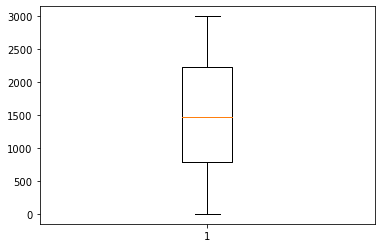

In [57]:
## As we learned earlier weeks, boxplots are useful to visualize the shape of the data. It can help in locating any 
## potential outliers and with the help of it, we can look to clean up data to delete outliers.

plt.boxplot(new_vd.visit)

In [58]:
## describe() method gives us useful characteristics like count, min, max, mean and quartiles numbers. We can also make
## use of these numbers in outlier detection using (median - 1.5IQR) and (median + 1.5IQR)

new_vd.visit.describe()

count     974.000000
mean     1497.976386
std       838.959460
min         1.000000
25%       794.500000
50%      1477.000000
75%      2224.250000
max      2998.000000
Name: visit, dtype: float64

In [59]:
## calculate Inter Quartile Range (IQR) : 
## using 6th occurence record, which is 75% quartile value and 4th occurence record which is 25% quartile value

IQR = new_vd.visit.describe()[6] - new_vd.visit.describe()[4]
IQR

1429.75

In [60]:
## (median - 1.5IQR) value calculation for lower cut-off for outlier range

outlier_min = new_vd.visit.describe()[4] - 1.5 * IQR
outlier_min

-1350.125

In [61]:
## (median + 1.5IQR) value calculation for upper cut-off for outlier range

outlier_max = new_vd.visit.describe()[6] + 1.5 * IQR
outlier_max

4368.875

By looking at the above values of lower and upper cut-off ranges for outlier detection, both those values are very much far from the min and max values shown in describe() method. So, we can drop this plan for outlier detection.
Hence we will use reference mainly 25% and 75% values, where most of the data is located, looking at the Box plot.
25% value is 794.5 and 75% value is 2224.25.

In [62]:
## We will look to use minimum value of 100 and maximum value of 2900 as our potential valid range of values for visit column.
## any other values outside this range will be considered as potential outliers for this exercise.

cleaned_vd = vd[(vd.visit >= 100) & (vd.visit <= 2900)]

In [63]:
## shape function provides the number of rows and columns information

cleaned_vd.shape

(923, 7)

In [ ]:
Based on above results with certain assumption about potential outlier values (as values below 100 and values above 2900 considered as outliers), we can see that the clean dataframe has 923 rows in it.

# 6. SQL Lite database

In [93]:
## import the packages
## sqlite3 package used for data processing - storage of data and reading of data - Python for Data Analysis (pg 191)

import sqlite3
import pandas as pd

In [94]:
# prepare the table creation query 

query = """
CREATE TABLE demographic
(name VARCHAR(20), 
address VARCHAR(40),
city VARCHAR(20), 
state VARCHAR(20),
zip INTEGER, 
phone_num INTEGER);"""

In [95]:
# create sqlite connection.

conn = sqlite3.connect('mydata.sqlite3')

In [96]:
# execute table creation query, defined above using the connection 'conn' - 

conn.execute(query)

OperationalError: table demographic already exists

In [97]:
## commit the table created in the database - 
## commit ensures that data tables created are stored permanently and changes are not lost

conn.commit()

In [98]:
# 10 data records to be inserted into demographics table. prepared some dummy data records, to be inserted to sql table.

data = [('Jagadeesh', '1012 Pinetree cir N', 'Buffalo Grove', 'Illinios', 60089, 8482478091),
        ('Venkat', '10454 W Jefferson St', 'Nashville', 'TENNESSEE', 37227, 6151234569),
        ('Jampani', '3456 W bush Dr', 'San Fransico', 'California', 94123, 4151234569),
        ('Suneetha', '9536 W Chester St', 'Columbus', 'Ohio', 43231, 7401234569),
        ('Meghan', '18945 N Joel Blvd', 'Flagstaff', 'Arizona', 86001, 9281234569),
        ('Snehitha', '654 E Gail St', 'HOUSTON', 'TEXAS', 77077, 2811234569),
        ('Christina', '1018 E Greenknols St', 'New York', 'NY', 10001, 2121234569),
        ('Lucy', '768 W Lambert St', 'Chicago', 'Illinois', 60018, 3121234569),
        ('Rangarao', '891 N Caren St', 'Minneapolis', 'Minnesota', 55111, 6121234569),
        ('Sai', '15403 BULL RUN Drive', 'Frisco', 'Texas', 75035, 2343421123)]

In [99]:
# Table records insertion statement - 

stmt = "INSERT INTO demographic VALUES(?, ?, ?, ?, ?, ?)"

In [100]:
# statement to insert all the data rows into the demographic table 

conn.executemany(stmt, data)

In [101]:
# commit the data added to the sql table. ensures data is stored permanently 

conn.commit()

In [102]:
## cursor statement to prepare the data to be fetched. select * statement helps fetch all records in the sql table.

cursor = conn.execute('select * from demographic')

In [103]:
# fetch and store the table data in the above step 

rows = cursor.fetchall()

In [104]:
# display data fetched 
rows

[('Robert', '123 E Skip St', 'Palatine', 'Illinios', 60004, 1234567891),
 ('Marget',
  '10454 W Jefferson St',
  'Nashville',
  'TENNESSEE',
  37227,
  6151234569),
 ('Steve', '3456 W bush Dr', 'San Fransico', 'California', 94123, 4151234569),
 ('Supraja', '9536 W Chester St', 'Columbus', 'Ohio', 43231, 7401234569),
 ('Prasobh', '18945 N Joel Blvd', 'Flagstaff', 'Arizona', 86001, 9281234569),
 ('Anirudh', '123 E Gail St', 'HOUSTON', 'TEXAS', 77077, 2811234569),
 ('Gautham', '123 E Greenknols St', 'New York', 'NY', 10001, 2121234569),
 ('Bindhu', '123 E Lambert St', 'Chicago', 'Illinois', 60018, 3121234569),
 ('Swapna', '123 E Caren St', 'Minneapolis', 'Minnesota', 55111, 6121234569),
 ('Isshu', '123 E Rony St', 'Kansas City', 'Kansas', 64134, 6201234569),
 ('Robert', '123 E Skip St', 'Palatine', 'Illinios', 60004, 1234567891),
 ('Marget',
  '10454 W Jefferson St',
  'Nashville',
  'TENNESSEE',
  37227,
  6151234569),
 ('Steve', '3456 W bush Dr', 'San Fransico', 'California', 94123, 415

In [105]:
## sqlalchemy package for data fetch from the table - 

import sqlalchemy as sqla

In [106]:
## description attribute for getting the column names -

cursor.description

(('name', None, None, None, None, None, None),
 ('address', None, None, None, None, None, None),
 ('city', None, None, None, None, None, None),
 ('state', None, None, None, None, None, None),
 ('zip', None, None, None, None, None, None),
 ('phone_num', None, None, None, None, None, None))

In [107]:
## create a DataFrame and store the table data fetched in a tabular (row X column) format for display purpose

pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,name,address,city,state,zip,phone_num
0,Robert,123 E Skip St,Palatine,Illinios,60004,1234567891
1,Marget,10454 W Jefferson St,Nashville,TENNESSEE,37227,6151234569
2,Steve,3456 W bush Dr,San Fransico,California,94123,4151234569
3,Supraja,9536 W Chester St,Columbus,Ohio,43231,7401234569
4,Prasobh,18945 N Joel Blvd,Flagstaff,Arizona,86001,9281234569
5,Anirudh,123 E Gail St,HOUSTON,TEXAS,77077,2811234569
6,Gautham,123 E Greenknols St,New York,NY,10001,2121234569
7,Bindhu,123 E Lambert St,Chicago,Illinois,60018,3121234569
8,Swapna,123 E Caren St,Minneapolis,Minnesota,55111,6121234569
9,Isshu,123 E Rony St,Kansas City,Kansas,64134,6201234569


In [108]:
## db connection to connect with sql database

db = sqla.create_engine('sqlite:///mydata.sqlite3')

In [109]:
## reading / displaying the table data using select query

pd.read_sql('select * from demographic', db)

,name,address,city,state,zip,phone_num
0,Robert,123 E Skip St,Palatine,Illinios,60004,1234567891
1,Marget,10454 W Jefferson St,Nashville,TENNESSEE,37227,6151234569
2,Steve,3456 W bush Dr,San Fransico,California,94123,4151234569
3,Supraja,9536 W Chester St,Columbus,Ohio,43231,7401234569
4,Prasobh,18945 N Joel Blvd,Flagstaff,Arizona,86001,9281234569
5,Anirudh,123 E Gail St,HOUSTON,TEXAS,77077,2811234569
6,Gautham,123 E Greenknols St,New York,NY,10001,2121234569
7,Bindhu,123 E Lambert St,Chicago,Illinois,60018,3121234569
8,Swapna,123 E Caren St,Minneapolis,Minnesota,55111,6121234569
9,Isshu,123 E Rony St,Kansas City,Kansas,64134,6201234569
